# Project1

## Step 1
Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

# from api_keys import geoapify_key

In [2]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42740 entries, 0 to 42739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  42740 non-null  int64  
 1   OPE ID                 42740 non-null  int64  
 2   School                 42740 non-null  object 
 3   City                   33650 non-null  object 
 4   State                  40700 non-null  object 
 5   Zip Code               33650 non-null  float64
 6   School Type            42740 non-null  object 
 7   Loan Type              42740 non-null  object 
 8   Recipients             42740 non-null  float64
 9   # of Loans Originated  42740 non-null  float64
 10  $ of Loans Originated  42740 non-null  float64
 11  # of Disbursements     42740 non-null  float64
 12  $ of Disbursements     42740 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 4.2+ MB


In [3]:
# Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42740 entries, 0 to 42739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  42740 non-null  int64  
 1   OPE ID                 42740 non-null  int64  
 2   School                 42740 non-null  object 
 3   City                   33650 non-null  object 
 4   State                  40700 non-null  object 
 5   Zip Code               42740 non-null  object 
 6   School Type            42740 non-null  object 
 7   Loan Type              42740 non-null  object 
 8   Recipients             42740 non-null  int64  
 9   # of Loans Originated  42740 non-null  int64  
 10  $ of Loans Originated  42740 non-null  float64
 11  # of Disbursements     42740 non-null  int64  
 12  $ of Disbursements     42740 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 4.2+ MB


In [4]:
df.head(10)

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,1051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487,Public,Subsidized,7594,7622,33040862.0,7622,16774054.0
1,1,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294,Public,Subsidized,4272,4352,18590061.0,4352,9058344.0
2,2,1009,AUBURN UNIVERSITY,AUBURN,AL,36849,Public,Subsidized,4504,4504,19474542.0,4535,10142490.0
3,3,1057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688,Public,Subsidized,3438,3487,15061071.0,3487,7557853.0
4,4,1047,TROY UNIVERSITY,TROY,AL,36082,Public,Subsidized,4334,4355,18467508.0,4355,7395839.0
5,5,1036,SAMFORD UNIVERSITY,BIRMINGHAM,AL,35229,Private-Nonprofit,Subsidized,638,638,2725011.0,638,1412105.0
6,6,1024,UNIVERSITY OF WEST ALABAMA,LIVINGSTON,AL,35470,Public,Subsidized,1085,1098,4552993.0,1098,2306439.0
7,7,42267,ALABAMA COLLEGE OF OSTEOPATHIC MEDICINE,DOTHAN,AL,36303,Private-Nonprofit,Subsidized,0,0,0.0,0,0.0
8,8,1020,JACKSONVILLE STATE UNIVERSITY,JACKSONVILLE,AL,36265,Public,Subsidized,2894,2895,12057276.0,2895,6150665.0
9,9,1050,TUSKEGEE UNIVERSITY,TUSKEGEE,AL,36088,Private-Nonprofit,Subsidized,1104,1107,4957913.0,1108,2482547.0


In [5]:
df.describe()

,index,OPE ID,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,42740.000000,42740.000000,42740.000000,42740.000000,4.274000e+04,42740.000000,4.274000e+04
mean,21369.500000,16201.447824,3798.421385,3909.581844,3.379861e+07,3974.820660,1.694132e+07
std,12338.119589,15479.494190,16547.929427,17095.803201,1.666734e+08,17393.746307,8.551740e+07
min,0.000000,1002.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,10684.750000,2848.000000,6.000000,7.000000,3.383300e+04,7.000000,1.700000e+04
50%,21369.500000,8447.500000,130.000000,132.000000,8.019415e+05,137.000000,3.912990e+05
75%,32054.250000,30837.000000,1287.000000,1318.250000,8.253579e+06,1350.000000,4.020021e+06
max,42739.000000,42933.000000,776959.000000,798927.000000,7.191430e+09,798927.000000,3.629214e+09


In [6]:
# drop total rows
df = df[~df['Loan Type'].str.contains('Total', case=False)]
df = df[~df['School Type'].str.contains('Foreign-Private', case=False)]
df = df[~df['School Type'].str.contains('Foreign-Public', case=False)]
df = df[~df['School Type'].str.contains('Foreign-For-Profit', case=False)]
df.drop(df[df['$ of Loans Originated'] == 0].index, inplace=True)
df

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,1051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487,Public,Subsidized,7594,7622,33040862.0,7622,16774054.0
1,1,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294,Public,Subsidized,4272,4352,18590061.0,4352,9058344.0
2,2,1009,AUBURN UNIVERSITY,AUBURN,AL,36849,Public,Subsidized,4504,4504,19474542.0,4535,10142490.0
3,3,1057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688,Public,Subsidized,3438,3487,15061071.0,3487,7557853.0
4,4,1047,TROY UNIVERSITY,TROY,AL,36082,Public,Subsidized,4334,4355,18467508.0,4355,7395839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21217,21217,2532,MONTANA STATE UNIVERSITY BOZEMAN,BOZEMAN,MT,59717,Public,Grad Plus,84,86,818532.0,86,408021.0
21224,21224,42509,INTER AMERICAN UNIVERSITY OF PUERTO RICO - SCH...,NaN,PR,NaN,Private-Nonprofit,Grad Plus,315,319,3817123.0,320,1911809.0
21225,21225,42510,INTER AMERICAN UNIVERSITY OF PUERTO RICO - SCH...,NaN,PR,NaN,Private-Nonprofit,Grad Plus,73,73,757500.0,73,384750.0
21236,21236,42542,INTER AMERICAN UNIVERSITY OF PUERTO RICO SAN G...,SAN GERMAN,PR,683,Private-Nonprofit,Grad Plus,1,1,18000.0,1,9000.0


## Step 2
### Ask the questions

State, What is the breakdown of number of collages in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

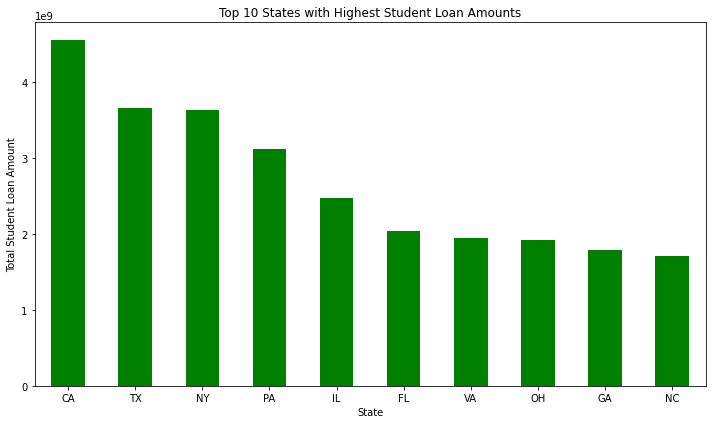

In [7]:
# Divide data into groups based on state, then sum the $ of loans originated in each state
state_loan_totals = df.groupby('State')['$ of Loans Originated'].sum()
# Sort the states by the total $ of loans originated in each state
top_10_states = state_loan_totals.sort_values(ascending=False).head(10)

# Plot the top 10 states with the highest student loan amounts
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='green')
plt.title('Top 10 States with Highest Student Loan Amounts')
plt.xlabel('State')
plt.ylabel('Total Student Loan Amount')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


In [8]:
top_10_states_df = df.merge(top_10_states, how='inner', left_on='State', right_index=True)
top_10_states_df

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated_x,# of Disbursements,$ of Disbursements,$ of Loans Originated_y
71,71,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Subsidized,3173,3188,7426683.0,3188,7426683.0,4.560513e+09
73,73,1315,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",LOS ANGELES,CA,90095,Public,Subsidized,4209,4224,18756159.0,4224,6483065.0,4.560513e+09
74,74,10149,PEPPERDINE UNIVERSITY,NaN,CA,NaN,Private-Nonprofit,Subsidized,792,796,3611912.0,797,1835026.0,4.560513e+09
75,75,1313,"UNIVERSITY OF CALIFORNIA, DAVIS",DAVIS,CA,95616,Public,Subsidized,5464,5467,24461982.0,5477,8204666.0,4.560513e+09
76,76,1312,"UNIVERSITY OF CALIFORNIA, BERKELEY",BERKELEY,CA,94720,Public,Subsidized,2905,3228,12565398.0,3228,6615250.0,4.560513e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,19071,3734,RANDOLPH COLLEGE,LYNCHBURG,VA,24503,Private-Nonprofit,Grad Plus,2,2,20150.0,2,8300.0,1.945670e+09
19251,19251,31065,SENTARA COLLEGE OF HEALTH SCIENCES,CHESAPEAKE,VA,23320,Private-Nonprofit,Grad Plus,36,36,617330.0,36,229547.0,1.945670e+09
19412,19412,38724,DIVINE MERCY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Grad Plus,34,34,789630.0,34,407429.0,1.945670e+09
19611,19611,3766,VIRGINIA UNION UNIVERSITY,RICHMOND,VA,23220,Private-Nonprofit,Grad Plus,5,5,130480.0,7,63940.0,1.945670e+09


In [9]:
top_10_states_df = df[df['State'].isin(top_10_states.index)]
top_10_states_df

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
71,71,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Subsidized,3173,3188,7426683.0,3188,7426683.0
73,73,1315,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",LOS ANGELES,CA,90095,Public,Subsidized,4209,4224,18756159.0,4224,6483065.0
74,74,10149,PEPPERDINE UNIVERSITY,NaN,CA,NaN,Private-Nonprofit,Subsidized,792,796,3611912.0,797,1835026.0
75,75,1313,"UNIVERSITY OF CALIFORNIA, DAVIS",DAVIS,CA,95616,Public,Subsidized,5464,5467,24461982.0,5477,8204666.0
76,76,1312,"UNIVERSITY OF CALIFORNIA, BERKELEY",BERKELEY,CA,94720,Public,Subsidized,2905,3228,12565398.0,3228,6615250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511,20511,41763,BERGIN UNIVERSITY OF CANINE STUDIES,PENNGROVE,CA,94951,Private-Nonprofit,Grad Plus,2,2,35620.0,2,17811.0
20518,20518,38883,DRAGON RISES COLLEGE OF ORIENTAL MEDICINE,NaN,FL,NaN,Private-Nonprofit,Grad Plus,6,6,54900.0,6,27450.0
20554,20554,41335,ACADEMY FOR FIVE ELEMENT ACUPUNCTURE,GAINESVILLE,FL,32601,Private-Nonprofit,Grad Plus,4,4,35352.0,4,21414.0
20759,20759,3948,SAN FRANCISCO ART INSTITUTE,SAN FRANCISCO,CA,94133,Private-Nonprofit,Grad Plus,2,2,18952.0,2,9476.0


In [10]:
top_10_states

State
CA    4.560513e+09
TX    3.659070e+09
NY    3.628170e+09
PA    3.124201e+09
IL    2.475198e+09
FL    2.037439e+09
VA    1.945670e+09
OH    1.923910e+09
GA    1.792659e+09
NC    1.716091e+09
Name: $ of Loans Originated, dtype: float64

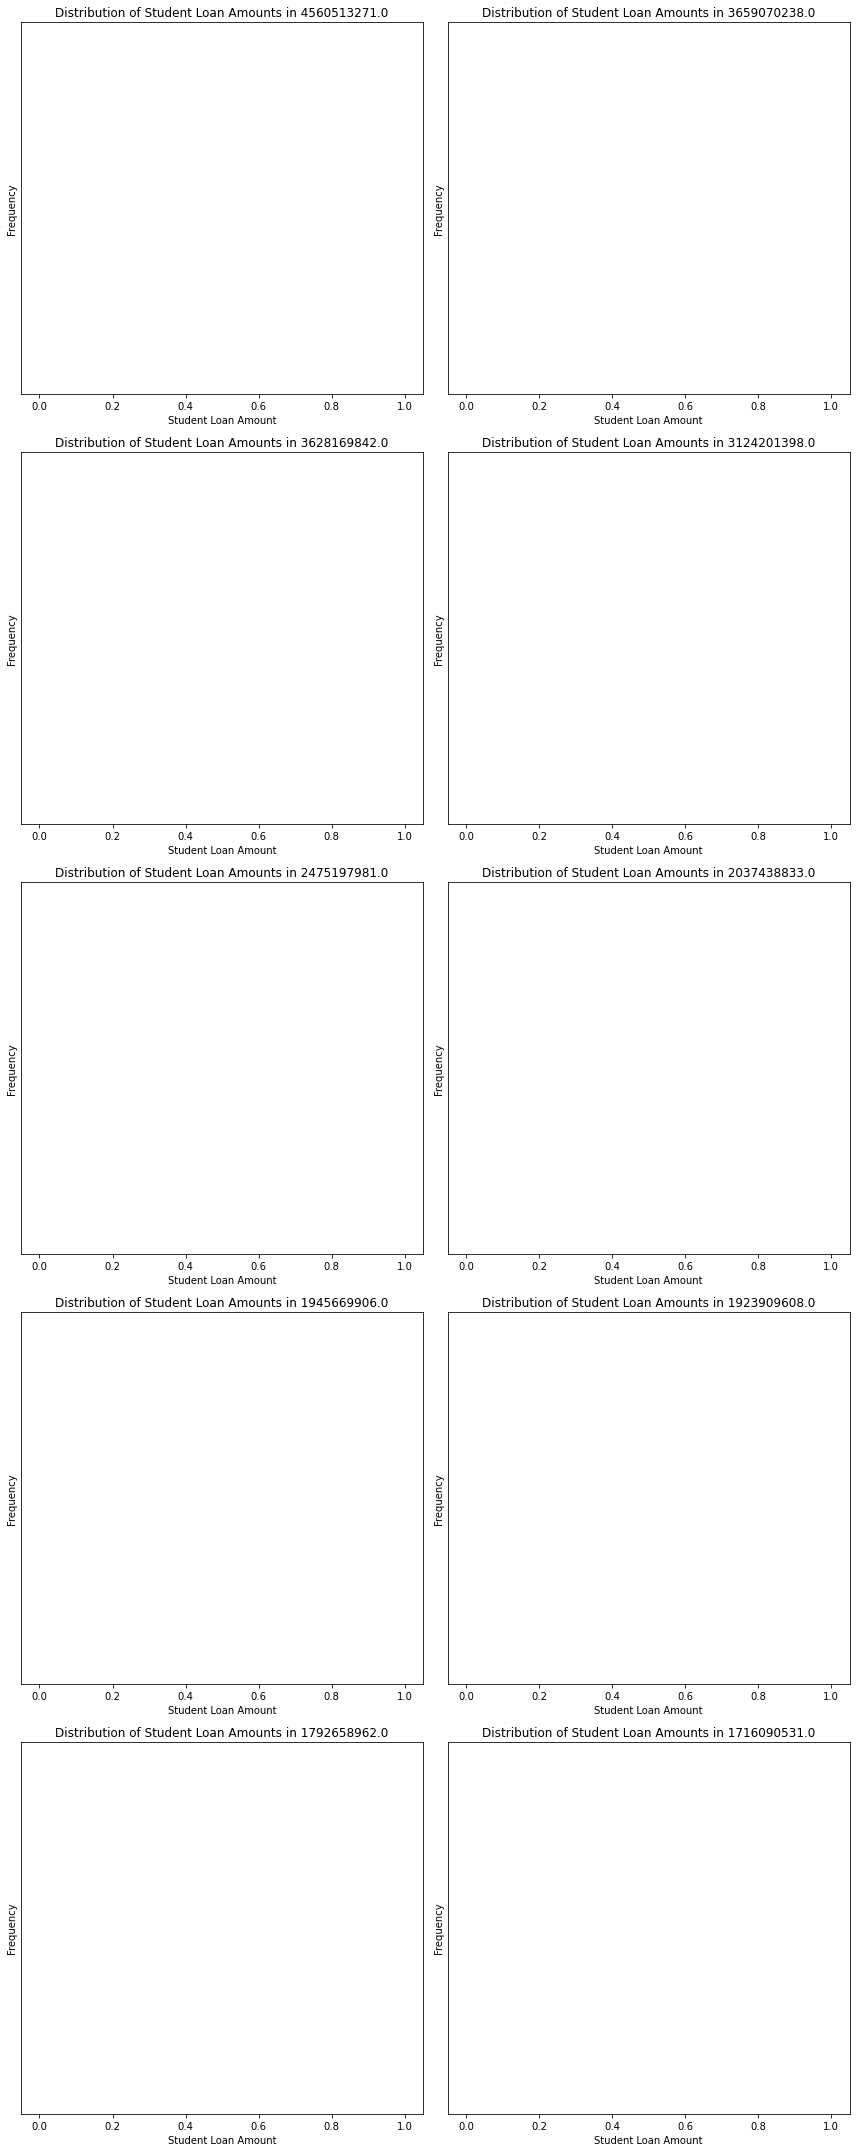

In [11]:
# box plot and histogram of student loan amounts by state -- not working
num_plots = len(top_10_states)
num_rows = (num_plots + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))

for i, state in enumerate(top_10_states):
    row = i // 2
    col = i % 2
    
    state_data = df[df['State'] == state]['$ of Loans Originated']
    
    axs[row, col].hist(state_data, bins=20, color='blue', alpha=0.7)
    axs[row, col].set_title(f'Distribution of Student Loan Amounts in {state}')
    axs[row, col].set_xlabel('Student Loan Amount')
    axs[row, col].set_ylabel('Frequency')
    
    axs[row, col].boxplot(state_data, vert=False, positions=[state_data.median()])
    
    plt.tight_layout()

# plt.show()

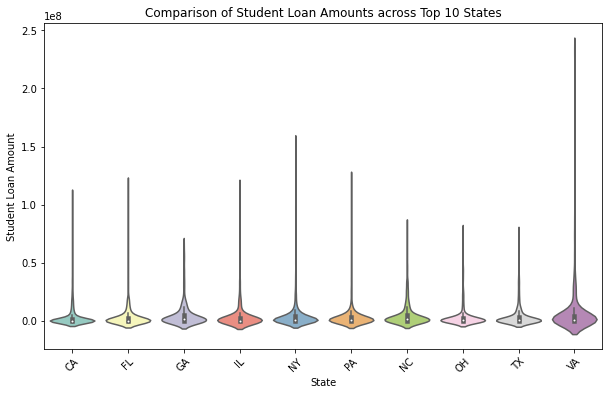

In [12]:
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='$ of Loans Originated', data=top_10_states_df, palette='Set3', scale='width')
plt.title('Comparison of Student Loan Amounts across Top 10 States')
plt.xlabel('State')
plt.ylabel('Student Loan Amount')
plt.xticks(rotation=45)

plt.show()

In [13]:
# Levene's test for homogeneity of variance
from scipy.stats import levene

# Create list of dataframes for top 3 states
top_states = ['CA', 'TX', 'NY']
loan_data = [top_10_states_df[top_10_states_df['State'] == state]['$ of Loans Originated'] for state in top_states]

# Levene's test
statistic, p_value = levene(loan_data[0], loan_data[1], loan_data[2])

# Print the results
print("Levene's Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check the assumption
alpha = 0.05
if p_value < alpha:
    print("The variances are not homogeneous (reject null hypothesis)")
else:
    print("The variances are homogeneous (fail to reject null hypothesis)")

Levene's Test:
Test Statistic: 2.07725920190144
P-value: 0.12545378024166495
The variances are homogeneous (fail to reject null hypothesis)


In [14]:
# Anova anlysis for top 3 states
from scipy.stats import f_oneway

# Welch's ANOVA: no homogeneous variance
statistic, p_value = f_oneway(*loan_data)

# Print the results
print("Welch's ANOVA:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There are significant differences between at least two groups (reject null hypothesis)")
else:
    print("There are no significant differences between the groups (fail to reject null hypothesis)")

Welch's ANOVA:
Test Statistic: 2.616017436928647
P-value: 0.07326062025766786
There are no significant differences between the groups (fail to reject null hypothesis)


Tukey-Kramer Test - Pairwise Comparisons:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper     reject
-----------------------------------------------------------------
    CA     NY 723703.2516 0.2083 -278687.7815 1726094.2847  False
    CA     TX 897910.7742 0.0941 -114235.2807 1910056.8291  False
    NY     TX 174207.5226    0.9  -935201.457 1283616.5021  False
-----------------------------------------------------------------


/Users/limu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


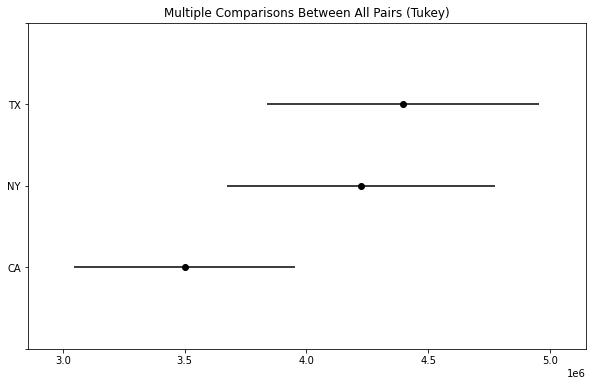

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey-Kramer test for pairwise comparisons
tukey_result = pairwise_tukeyhsd(np.concatenate(loan_data), np.repeat(top_states, [len(d) for d in loan_data]))
print("Tukey-Kramer Test - Pairwise Comparisons:")
print(tukey_result)

# Plot the results
tukey_result.plot_simultaneous()
plt.show()


Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

In [16]:
import statsmodels.api as sm

# Create a copy of your original DataFrame
mlm_df = df.copy()
#mlm_df['School_Type'] = mlm_df['School_Type'].astype(float) # Convert the column to float
#mlm_df['Loan_Type'] = mlm_df['Loan_Type'].astype(float)
#mlm_df['State'] = mlm_df['State'].astype(float)
mlm_df['$ of Loans Originated'] = mlm_df['$ of Loans Originated'].astype(float)

# Convert categorical variables into dummy variables
categorical_vars = ['School Type', 'Loan Type', 'State']
# Set the drop_first=True argument to avoid multicollinearity.
mlm_df = pd.get_dummies(mlm_df, columns=categorical_vars, drop_first=True) 

# Intercept always is 1 when importing each dummy variable
mlm_df['intercept'] = 1

# Define dependent variable
# dependent_var = '$ of Loans Originated'
dependent_var = mlm_df['$ of Loans Originated']

# Define independent variables (including the intercept)
irrelevant_vars = ['index','OPE ID','School','City','Zip Code','Recipients', '# of Loans Originated', '$ of Loans Originated', '# of Disbursements','$ of Disbursements',]
mlm_df_ind = mlm_df.drop(irrelevant_vars, axis=1)

independent_vars = mlm_df_ind.columns.tolist()

# Create a model
X = mlm_df[independent_vars].values
# y = mlm_df[dependent_var].values
y = dependent_var.values
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     27.87
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          8.00e-286
Time:                        21:42:57   Log-Likelihood:            -2.3258e+05
No. Observations:               13283   AIC:                         4.653e+05
Df Residuals:                   13223   BIC:                         4.657e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.114e+06   2.29e+05     -9.241      0.0

In [17]:
# add interaction terms to the model
interaction_vars = ['School Type_Proprietary', 'Loan Type_Parent Plus', 'State_NY']
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_name = f'{var1}_x_{var2}'
            mlm_df[interaction_name] = mlm_df[var1] * mlm_df[var2]

# update independent_vars
independent_vars += interaction_vars

# new X matrix
X = mlm_df[independent_vars].values

# fit the possible interaction to model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     27.60
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          7.19e-283
Time:                        21:42:58   Log-Likelihood:            -2.3259e+05
No. Observations:               13283   AIC:                         4.653e+05
Df Residuals:                   13223   BIC:                         4.657e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.211e+20   4.16e+19     -2.914      0.0

In [18]:
import statsmodels.api as sm

# Create a copy of your original DataFrame
mlm_df = df.copy()
#mlm_df['School_Type'] = mlm_df['School_Type'].astype(float) # Convert the column to float
#mlm_df['Loan_Type'] = mlm_df['Loan_Type'].astype(float)
#mlm_df['State'] = mlm_df['State'].astype(float)
mlm_df['$ of Loans Originated'] = mlm_df['$ of Loans Originated'].astype(float)

# Convert categorical variables into dummy variables
categorical_vars = ['School Type', 'Loan Type', 'State']
# Set the drop_first=True argument to avoid multicollinearity.
mlm_df = pd.get_dummies(mlm_df, columns=categorical_vars, drop_first=True) 

# Intercept always is 1 when importing each dummy variable
mlm_df['intercept'] = 1

# Define dependent variable
# dependent_var = '$ of Loans Originated'
dependent_var = mlm_df['$ of Loans Originated']

# Define independent variables (including the intercept)
irrelevant_vars = ['index','OPE ID','School','City','Zip Code','Recipients', '# of Loans Originated', '$ of Loans Originated', '# of Disbursements','$ of Disbursements',]
mlm_df_ind = mlm_df.drop(irrelevant_vars, axis=1)

independent_vars = mlm_df_ind.columns.tolist()
independent_vars


['School Type_Proprietary',
 'School Type_Public',
 'Loan Type_Parent Plus',
 'Loan Type_Subsidized',
 'Loan Type_Unsubsidized - Graduate',
 'Loan Type_Unsubsidized - Undergraduate',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_GU',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_PR',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VI',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'intercept']

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

API, Foreign university, VS US

More datasets